In [62]:
setwd("/home/simingz/run_rasqual/datarun/CN2")

See header info [here](https://github.com/natsuhiko/rasqual/blob/master/README.md)

In [63]:
addgFDR_getp <- function(mrestable, prestable){
        ntest <- mrestable[,18]
        tt <- mrestable[,11]
        preal <- pchisq(tt,df=1,lower.tail=F,log.p=F)
        ttperm <- prestable[,3] # keep only 1 permutation
        pperm <- pchisq(ttperm,df=1,lower.tail=F,log.p=F)
        out <-cbind(preal*ntest,pperm*ntest) # bonferroni corrected p value
    return(out)
}

In [64]:
mainfall= Sys.glob( paste0("mainrun_chr*_CN*.result.txt"))
outp <- NULL
outmres <- NULL
for (mainf in mainfall){
    permf = gsub("result.txt","permres.txt",gsub("main","perm",mainf)) 
    mres <- read.table(mainf,header=F,stringsAsFactors = F, sep="\t",fill=T)
    pres <- read.table(permf,header=F,stringsAsFactors = F, sep="\t",fill=T)
    mresfl <- mres[mres$V2 != "SKIPPED",]
    presfl <- pres[mres$V2 != "SKIPPED",]
    if (dim(mresfl)[1]==0){next}
    outmres <- rbind(outmres,cbind(mresfl,presfl))
    outp <- rbind(outp, addgFDR_getp(mresfl,presfl))
} 

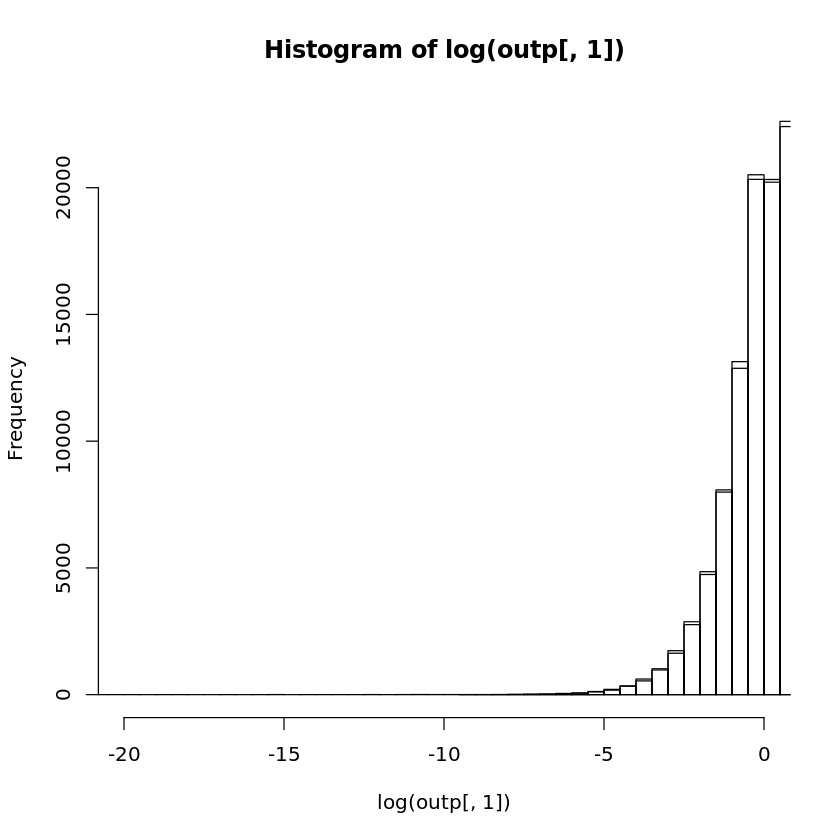

In [67]:
hist(log(outp[,1]),xlim=c(-20,0),breaks=400)
hist(log(outp[,2]),xlim=c(-20,0),breaks=20,add=T)

In [21]:
a <- read.table("permrun_combined.permres.txt")

In [68]:
length(outmres[,28][outmres[,28]>5])

[1] 6128

In [69]:
pperm <-pchisq(outmres[,28],df=1,lower.tail=F,log.p=F)
preal <-pchisq(outmres[,11],df=1,lower.tail=F,log.p=F)*outmres[,18]
length(preal[preal<0.1])

[1] 5261

In [48]:
preal[preal>1]<-1

In [49]:
pBH <- p.adjust(preal,"BH")

In [50]:
length(pBH[pBH<0.1])

[1] 116

In [88]:
outmres[outmres$V1=="newCN536",1-12] # this one is kept but has larger p value than binomial test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V1.1,V2.1,V3.1,V4.1,V5.1
48660,newCN536,1:4586606,chr1,4526546,C,T,0.3,0.725624,0.999823,-1.840093,⋯,4526546,-247.7804,0,0.859654,0.990554,newCN536,-0.5158208,2.573806,0.610873,0.969913


In [87]:
pchisq(10.76,df=1,lower.tail=F,log.p=F)

[1] 0.001037174

In [89]:
outmres[outmres$V1=="newCN1640",1-12] # this one is filtered due to low R2

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V1.1,V2.1,V3.1,V4.1,V5.1


In [92]:
outmres[outmres$V1=="newCN503",]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V1,V2,V3,V4,V5
45058,newCN503,1:4013535,chr1,3953475,G,A,0.075,0.131483,0.961758,-0.2299273,⋯,3953475,-168.8818,0,NaN,0.921346,newCN503,-0.2940255,0.4400933,0.448913,0.574057


In [103]:
system("tabix /home/simingz/run_rasqual/phased_data/chr1.hg38withchr.AS.vcf.gz chr1:3953332-3957576| grep 3954546", intern=T)

[1] "chr1\t3954546\t1:4014606\tA\tG\t.\tPASS\tAF=0.06781;MAF=0.06781;R2=0.72191\tGT:DS:GP:AS\t0|0:0.012:0.988,0.012,0.000:14,0\t0|0:0.008:0.992,0.008,0.000:13,0\t1|0:0.988:0.019,0.974,0.007:18,32\t0|0:0.015:0.985,0.015,0.000:25,0\t0|0:0.009:0.991,0.009,0.000:12,0\t0|0:0.015:0.985,0.015,0.000:10,0\t0|0:0.008:0.992,0.008,0.000:31,0\t0|0:0.018:0.982,0.018,0.000:16,0\t0|0:0.021:0.979,0.021,0.000:4,0\t0|0:0.007:0.993,0.007,0.000:13,0\t0|1:0.691:0.316,0.677,0.007:3,14\t0|0:0.013:0.987,0.013,0.000:7,0\t0|0:0.027:0.973,0.026,0.000:6,0\t0|1:0.764:0.237,0.761,0.002:2,5\t0|0:0.016:0.984,0.016,0.000:18,0\t0|0:0.017:0.983,0.017,0.000:20,0\t0|0:0.018:0.982,0.018,0.000:11,0\t0|0:0.030:0.971,0.029,0.000:3,0\t0|0:0.012:0.989,0.011,0.000:11,0\t0|0:0.022:0.978,0.022,0.000:22,0"